# Introduction to the problem
<br>
Trade Call Prediction using Classification
In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (StockPrice = Close Price)

In [4]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

<b> Problem Statement 4.1</b>
<br><br>
Import the csv file of the stock which contained the Bollinger columns as well.

 Create a new column 'Call' , whose entries are -
'Buy' if the stock price is below the lower Bollinger band
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
'Short' if the stock price is above the upper Bollinger band

 Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output.Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and comparethe accuracy for each)

 Import another stock data and create the bollinger columns. Using the already defined model, predict the daily callsfor this new stock.

In [5]:
data=pd.read_csv('data/week3.csv') #importing the module 2 worked file


In [6]:
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
month                      0
Day_Perc_Change            0
Trend                      0
ave                       13
upper                     13
lower                     13
dtype: int64

In [7]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [8]:
data['Call']=0
for i in np.arange(data.ave.size):
    if data['Average Price'][i]>=data.upper[i]:
        print(i)
        data['Call'][i]='Short'
    elif data['Average Price'][i]<=data.lower[i]:
        print(i)
        data['Call'][i]='Buy'
    elif (data['Average Price'][i]>data.lower[i]) and (data['Average Price'][i]<=data.ave[i]):
        print (i)
        data['Call'][i]='Hold Buy/Liquidate Short'
    else:
        print (i)
        data['Call'][i]='Hold Short/Liquidate Buy'
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
data.Call.value_counts()

Hold Short/Liquidate Buy    261
Hold Buy/Liquidate Short    191
Short                        22
Buy                           7
Name: Call, dtype: int64

In [10]:
RFX=data[['Average Price','upper', 'lower','ave']]
RFy=data['Call']
RFX_train,RFX_test, RFy_train, RFy_test= train_test_split(RFX, RFy, test_size=.25, random_state=42)

In [11]:
classifier=RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='entropy',random_state=23, max_depth=10) 
#here n estimators are the number of decision tree used and the answer is calculated using entropy method one can also use
#gini index method.
classifier.fit(RFX_train, RFy_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

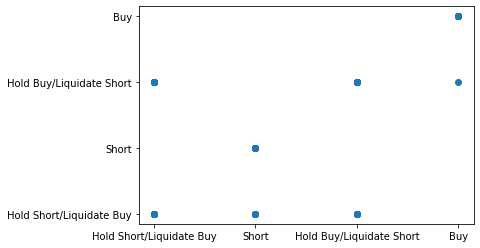

In [12]:
RFy_pred=classifier.predict(RFX)
plt.scatter(RFy, RFy_pred)
plt.show()

In [13]:
check=[RFy.values,RFy_pred]
check=pd.DataFrame(check)
check=check.T
check.columns=['Call','Prediction']
check

,Call,Prediction
0,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
1,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
3,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
4,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
...,...,...
476,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
477,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
478,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
479,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy


In [14]:
#using a for loop iteration we are checking total number of mataches and mismataches of the call and predicted values
f=0
for i in np.arange(len(data.ave)):
    if check.iloc[i,0]!=check.iloc[i,1]:
        f=f+1
print(f)
accuracy=(RFy_test.size-f)/RFy_test.size #checking accuracy of currently matched values to the totaltest size
accuracy

21


0.8264462809917356

In [15]:
#1C homework
data1=pd.read_csv('data/TCS.csv')
def bbands(price,length=14,numsd=2):
    ave=price.rolling(length).mean()
    sd=price.rolling(length).std()
    upband=ave+(sd*numsd)
    dnband=ave-(sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)
data1['ave'],data1['upper'], data1['lower']=bbands(data1['Close Price'])

In [16]:
data1.tail()


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,ave,upper,lower
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.479,2280.680,2042.277
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.361,2256.002,2086.719
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.593,2253.376,2097.810
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.879,2252.995,2098.762
497,TCS,EQ,13-May-2019,2135.80,2133.00,2167.00,2121.65,2134.00,2128.75,2143.87,1701744,3.648325e+09,74014,677242,39.80,2174.357,2254.452,2094.262


In [17]:
data1.isnull().sum()

Symbol                     0
Series                     0
Date                       0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
ave                       13
upper                     13
lower                     13
dtype: int64

In [18]:
data1.dropna(inplace=True)
data1.reset_index(inplace=True)

In [19]:
data1['Call']=0
for i in np.arange(data1.ave.size):
    if data1['Average Price'][i]>=data1.upper[i]:
        print(i)
        data1['Call'][i]='Short'
    elif data1['Average Price'][i]<=data1.lower[i]:
        print(i)
        data1['Call'][i]='Buy'
    elif (data1['Average Price'][i]>data1.lower[i]) and (data1['Average Price'][i]<=data1.ave[i]):
        print (i)
        data1['Call'][i]='Hold Buy/Liquidate Short'
    else:
        print (i)
        data1['Call'][i]='Hold Short/Liquidate Buy'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
data1.Call.value_counts()

Hold Short/Liquidate Buy    267
Hold Buy/Liquidate Short    183
Short                        18
Buy                          17
Name: Call, dtype: int64

In [21]:
RFX=data1[['Average Price','upper', 'lower','ave']]
RFy=data1['Call']
RFX_train,RFX_test, RFy_train, RFy_test= train_test_split(RFX, RFy, test_size=.25, random_state=42)



In [22]:
classifier=RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='entropy',random_state=23, max_depth=10) 
classifier.fit(RFX_train, RFy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

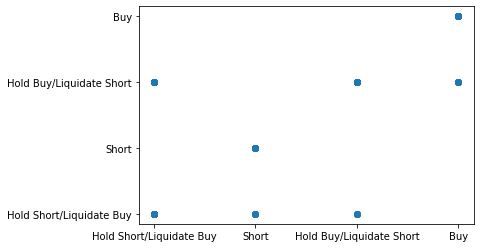

In [23]:
RFy_pred=classifier.predict(RFX)
plt.scatter(RFy, RFy_pred)
plt.show()

In [24]:
check=[RFy.values,RFy_pred]
check=pd.DataFrame(check)
check=check.T
check.columns=['Call','Prediction']
check

,Call,Prediction
0,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
1,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
3,Short,Short
4,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
...,...,...
480,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
481,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
482,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
483,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short


In [25]:
#using a for loop iterationwe are checking total number of mataches and mismataches of the call and predicted values
f=0
for i in np.arange(len(data1.ave)):
    if check.iloc[i,0]!=check.iloc[i,1]:
        f=f+1
print(f)
accuracy=(RFy_test.size-f)/RFy_test.size #checking accuracy of currently matched values to the totaltest size
accuracy

24


0.8032786885245902

<b> Problem Statement 4.2</b>

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over thepast two years. For this assignment , we will use RandomForest classifier.

 Import the stock data file of your choice 

 Define 4 new columns , whose values are:
% change between Open and Close price for the day
% change between Low and High price for the day
5 day rolling mean of the day to day % change in Close Price
5 day rolling std of the day to day % change in Close Price

 Create a new column 'Action' whose values are:
1 if next day's price(Close) is greater than present day's.
(-1) if next day's price(Close) is less than present day's.
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

 Construct a classification model with the 4 new inputs and 'Action' as target

 Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmicmodel

In [26]:
#Query 2
data3=pd.read_csv('data/week3.csv')
data3['Open-Close']=(data3['Open Price']-data3['Close Price'])/data3['Open Price']
data3['High-Low']=(data3['High Price']-data3['Low Price'])/data3['Low Price']
data3['std_5']=data3['Day_Perc_Change'].rolling(5).std()
data3['ret_5']=data3['Day_Perc_Change'].rolling(5).mean()
data3.dropna(inplace=True)

In [27]:
data3['Action']=np.where(data3['Close Price'].shift(-1)>data3['Close Price'],1,-1)

In [28]:
#X is the input variable
X=data3[['Open-Close','High-Low','std_5','ret_5']]
#y is the target or output variable
y=data3['Action']


In [29]:
result=pd.concat([data3['Close Price'],y], axis=1, join='inner')
result

,Close Price,Action
13,1628.60,1
14,1634.25,1
15,1635.55,1
16,1638.95,1
17,1640.80,1
...,...,...
489,2322.35,-1
490,2307.25,-1
491,2290.90,1
492,2296.50,-1


In [30]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=.25, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)


(360, 4) (121, 4)
(360,) (121,)


In [31]:
clf=RandomForestClassifier(random_state=5)
model=clf.fit(X_train,y_train)

In [32]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%):', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%): 52.066115702479344


In [33]:
data3['strategy_returns']=data3['Day_Perc_Change']*model.predict(X)

In [34]:
data3


,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Trend,ave,upper,lower,Open-Close,High-Low,std_5,ret_5,Action,strategy_returns
13,2017-06-01,HDFCBANK,EQ,1636.20,1639.00,1639.85,1620.55,1627.00,1628.60,1630.91,...,Slight or No Change,1590.664,1659.398,1521.931,0.006345,0.011910,0.438537,0.141977,1,-0.464491
14,2017-06-02,HDFCBANK,EQ,1628.60,1634.00,1646.10,1626.20,1631.85,1634.25,1636.04,...,Slight or No Change,1596.439,1665.272,1527.607,-0.000153,0.012237,0.399682,0.101910,1,0.346924
15,2017-06-05,HDFCBANK,EQ,1634.25,1633.70,1638.95,1625.00,1638.50,1635.55,1633.27,...,Slight or No Change,1601.861,1670.165,1533.556,-0.001132,0.008585,0.372605,0.045249,1,0.079547
16,2017-06-06,HDFCBANK,EQ,1635.55,1635.00,1643.80,1630.00,1639.00,1638.95,1638.50,...,Slight or No Change,1607.704,1673.481,1541.927,-0.002416,0.008466,0.355024,0.121753,1,0.207881
17,2017-06-07,HDFCBANK,EQ,1638.95,1640.40,1644.90,1630.35,1641.30,1640.80,1638.26,...,Slight or No Change,1613.682,1674.688,1552.676,-0.000244,0.008924,0.309194,0.056548,1,0.112877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,HDFCBANK,EQ,2328.45,2351.90,2358.00,2318.00,2320.10,2322.35,2338.90,...,Slight or No Change,2298.779,2370.682,2226.875,0.012564,0.017256,1.390929,0.368142,-1,0.261977
490,2019-05-08,HDFCBANK,EQ,2322.35,2322.55,2323.80,2288.00,2309.00,2307.25,2304.51,...,Slight Negative,2301.779,2371.115,2232.442,0.006588,0.015647,1.249489,-0.081941,-1,0.650203
491,2019-05-09,HDFCBANK,EQ,2307.25,2300.00,2300.00,2271.60,2292.00,2290.90,2287.67,...,Slight Negative,2301.929,2371.153,2232.704,0.003957,0.012502,0.791209,-0.554635,1,-0.708636
492,2019-05-10,HDFCBANK,EQ,2290.90,2291.35,2324.90,2291.35,2296.50,2296.50,2306.93,...,Slight or No Change,2301.318,2370.574,2232.061,-0.002248,0.014642,0.703941,-0.608896,-1,0.244445


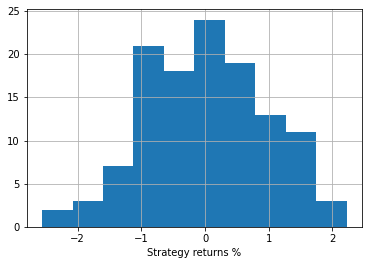

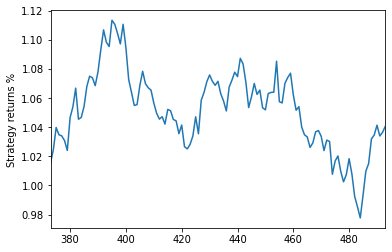

In [35]:
data3.strategy_returns[y_train.size:].hist()
plt.xlabel('Strategy returns %')
plt.show()
((data3.strategy_returns[y_train.size:]+100)/100).cumprod().plot()
plt.ylabel('Strategy returns %')
plt.show()